<a href="https://colab.research.google.com/github/MarkAvilin1/DS-and-ML/blob/main/pytorch_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
from tensorflow.keras import utils 
from google.colab import drive
import torch.nn as nn
import pandas as pd
import numpy as np
import torch
import re

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/University AI/datasets/hh_fixed.csv'

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.head()

,Unnamed: 0,"Пол, возраст",ЗП,Ищет работу на должность:,Город,Занятость,График,Опыт (двойное нажатие для полной версии),Последенее/нынешнее место работы,Последеняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,0,"Мужчина , 29 лет , родился 16 мая 1989",40000 руб.,Специалист по поддержке чата(support team) дом...,"Новороссийск , готов к переезду (Анапа, Геленд...",полная занятость,полный день,Опыт работы 3 года 9 месяцев Специалист по по...,"ООО ""Гольфстрим""",Генеральный директор,Высшее образование 2011 Международный юридиче...,26.04.2019 08:04,Не указано
1,1,"Мужчина , 38 лет , родился 25 мая 1980",40000 руб.,Системный администратор,"Новосибирск , м. Березовая роща , не готов к ...",полная занятость,полный день,Опыт работы 11 лет 11 месяцев Системный админ...,ООО «Завод модульных технологий»,Системный администратор,Высшее образование 2002 Новосибирский государс...,26.04.2019 04:30,Не указано
2,2,"Мужчина , 35 лет , родился 14 июня 1983",300000 руб.,DevOps TeamLead / DevOps архитектор,"Москва , готов к переезду , готов к редким ком...",полная занятость,полный день,Опыт работы 12 лет 11 месяцев DevOps TeamLead...,Банк ВТБ (ПАО),Начальник отдела методологии разработки (DevOp...,DevOps TeamLead / DevOps архитектор 300 000 ру...,09.04.2019 14:40,Не указано
3,3,"Мужчина , 33 года , родился 2 августа 1985",180000 руб.,Руководитель IT отдела,"Москва , м. Щукинская , не готов к переезду ,...","частичная занятость, полная занятость","удаленная работа, полный день",Опыт работы 15 лет 10 месяцев Руководитель IT...,"""Ай-Теко"", ведущий российский системный интегр...",Старший системный администратор,Руководитель IT отдела 180 000 руб. Информацио...,09.04.2019 14:39,Имеется собственный автомобиль
4,4,"Мужчина , 22 года , родился 1 сентября 1996",40000 руб.,Junior Developer,"Москва , м. Юго-Западная , не готов к переезд...","стажировка, частичная занятость, проектная работа","гибкий график, удаленная работа",Опыт работы 1 год 1 месяц Junior Developer 40...,R-Style SoftLab,Менеджер IT-проектов,Junior Developer 40 000 руб. Информационные те...,29.03.2019 12:40,Не указано


In [ ]:
n = 10 
for i in range(len(data.values[n])):
  print(i, " ", data.values[n][i])

0   10
1   Мужчина ,  61 год , родился 16 февраля 1958
2   2000 EUR
3   Программист
4   Москва , не готов к переезду , не готов к командировкам
5   полная занятость
6   полный день
7   Опыт работы 27 лет 4 месяца  Программист 2 000 EUR Информационные технологии, интернет, телеком Программирование, Разработка Системная интеграция Занятость: полная занятость График работы: полный день Опыт работы 27 лет 4 месяца Январь 2008 — по настоящее время 11 лет 4 месяца Консалтинг КАС Главный аналитик Программирование на разных версиях RPG для AS/400 (iSeries). Модификация и доработка существующего кода, расширения функциональности системы. Разработка новых модулей и подсистем. Постановка задач, управление проектами. Январь 1993 — Январь  2008 15 лет 1 месяц Артекс, крупнейший дилер БМВ в Москве Директор по ИТ Доработка существующей системы управления дилерским предприятием (AS/400, iSeries). Все версии RPG (RPG36, RPG400, ILE RPG). Работа с DB2. Расширение функциональности системы, изменение сист

In [ ]:
# def getExperience(arg):
#   check_y = arg.split()[2]
#   check_m = arg.split()[4]
#   year = 0
#   month = 0
#   if check_y.isdigit():
#     year = int(check_y) * 12
#   elif check_y.isdigit():
#     month = int(check_m)
#   result = year + month
#   return result

In [ ]:
fixed_df = data.drop(data.columns[0],axis = 1) 
i=0
for j in range(12):  
    for i in range(fixed_df.shape[0]): 
        if type(fixed_df.values[i][j])!=float: 
            fixed_df.values[i][j] = fixed_df.values[i][j].replace("\xa0","")
            fixed_df.values[i][j] = fixed_df.values[i][j].replace("\n"," ")

In [ ]:
d = np.array(fixed_df[:1000])

In [ ]:
def getParameterSexAge(arg):
  out = [0,0]
  if "М" in arg:
    out[0] = 1
  year_tec = 2020
  if (len(arg) > 7):
    out[1] = year_tec - int(re.findall(r'\d{4}', arg)[0])
  return out


def getParameterAgeVect(arg):
  outClass =int((arg-13)/5)
  outClass = max(0, min(10,outClass))
  return list(utils.to_categorical(outClass, 11).astype('int'))


def getParameterSalary(arg):
    num = arg
    if (type(num) == str):
        num = re.sub(' ','',num)
        num = re.sub('[а-яА-ЯёЁ]','',num)
        num = re.sub('[a-zA-Z]','',num)
        num = num.replace('.','')
        curr = re.sub('[0-9]','',arg)
        curr = curr.replace('.','').strip()
        if curr == 'USD':
           num = float(num)*65
        elif curr == 'KZT':
           num = float(num)*0.17
        elif curr=='грн':
           num = float(num)*2.6
        elif curr=='белруб':
           num = float(num)*30.5
        elif curr=='EUR':
           num = float(num)*70
        elif curr=='KGS':
           num = float(num)*0.9
        elif curr=='сум':
           num = float(num)*0.007
        elif curr=='AZN':
           num = float(num)*37.5             
    salaryStr = int(num)     
    return salaryStr


def getParameterCity(arg):
  millionCities = "Новосибирск Екатеринбург Нижний Новгород Казань Челябинск Омск Самара Ростов-на-Дону Уфа Красноярск Пермь Воронеж Волгоград"
  sarg=arg.split(',')
  for item in sarg:
    item= item.strip()
    if item == "Москва":          return [1, 0, 0, 0]
    if item == "Санкт-Петербург": return [0, 1, 0, 0]
    if item in millionCities:     return [0, 0, 1, 0]
  return [0, 0, 0, 1]


def getParameterEmployment(arg):
  out= [0, 0, 0, 0]
  if ("стажировка" in arg):           out[0]=1
  if ("частичная занятость" in arg):  out[1]=1
  if ("проектная работа" in arg):     out[2]=1
  if ("полная занятость" in arg):     out[3]=1
  return out


def getParameterSchedule(arg):
  out = [0, 0, 0, 0]
  if ("гибкий график" in arg):    out[0]=1
  if ("полный день" in arg):      out[1]=1
  if ("сменный график" in arg):   out[2]=1
  if ("удаленная работа" in arg): out[3]=1
  return out


def getParameterEducation(arg):
  out = [0, 0, 0, 0] 
  if "Высшее" in arg or "Higher education" in arg:  out[0] = 1
  if "Среднее специальное" in arg:      out[1] = 1
  if "Неоконченное высшее" in arg:      out[2] = 1
  if "Среднее образование" in arg:      out[3] = 1
  return out


def getParameterExperience(arg):
  arg = str(arg)
  symbols = 0
  years = 0
  months = 0
  for s in arg:
    if (s != " "):
      symbols += 1
  if (symbols > 10):
      spacesIndexes = []
      index = 0
      while ((len(spacesIndexes) < 5) & (index < len(arg))):
          if (arg[index] == " "):
              spacesIndexes.append(index)
          index += 1
      years = 0
      months = 0
      if (arg[spacesIndexes[2]+1] != "м"):
         if (len(spacesIndexes) >= 3):
            yearsStr = arg[spacesIndexes[1]:spacesIndexes[2]] 
            years = int(yearsStr)      
         if (len(spacesIndexes) >= 5):
            monthsStr = arg[spacesIndexes[3]:spacesIndexes[4]] 
            if(arg[spacesIndexes[2]+1] == "м"):
                months = int(monthsStr)
      else:
        if (len(spacesIndexes) >= 3):
          monthsStr = arg[spacesIndexes[1]:spacesIndexes[2]]
          months = int(monthsStr)      
  return 12*years+months


def getParameterExperienceVector(arg):
  out = getParameterExperience(arg)
  outClass = 0
  if (out > 6): 
    outClass = 1
  if (out > 12): 
    outClass = 2
  if (out > 24): 
    outClass = 3
  if (out > 36): 
    outClass = 4
  if (out > 60): 
    outClass = 5
  if (out > 96): 
    outClass = 6
  if (out > 120): 
    outClass = 7
  if (out > 156): 
    outClass = 8
  if (out > 192): 
    outClass = 9 
  if (out > 240): 
    outClass = 10  
  return list(utils.to_categorical(outClass, 11).astype('int'))


def getAllParameters(val):
  result = getParameterSexAge(val[0])
  sex = result[0]  
  age =getParameterAgeVect(result[1]) 
  city = getParameterCity(val[3]) 
  employment = getParameterEmployment(val[4]) 
  shedule = getParameterSchedule(val[5]) 
  education = getParameterEducation(val[9]) 
  experience = getParameterExperienceVector(val[6]) 
  out = []  
  out.append(sex)
  out += age
  out += city
  out += employment
  out += shedule
  out += education
  out += experience  
  return out


def getAllData(values):
  xTrain = []
  yTrain = []
  for val in values:
    y = getParameterSalary(val[1])
    x = getAllParameters(val)
    xTrain.append(x)
    yTrain.append(y/1000)  
  xTrain = np.array(xTrain)
  yTrain = np.array(yTrain)  
  return (xTrain, yTrain)

In [ ]:
(xTrain, yTrain) = getAllData(d)

In [ ]:
print(xTrain.shape, yTrain.shape)

(1000, 39) (1000,)


In [ ]:
print(xTrain[21])

[1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0]


In [ ]:
X = torch.from_numpy(xTrain.astype(np.float32))
y = torch.from_numpy(yTrain.astype(np.float32))
y = y.view(y.shape[0], 1)

In [ ]:
print(X.shape, y.shape)

torch.Size([1000, 39]) torch.Size([1000, 1])


In [ ]:
n_samples, n_features = X.shape
input_size = n_features
output_size = 1

In [ ]:
model = nn.Linear(input_size, output_size)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
epochs = 1000
for epoch in range(epochs):
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if(epoch + 1) % 100 == 0:
    print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

epoch: 100, loss = 2628.6602
epoch: 200, loss = 2626.6580
epoch: 300, loss = 2624.8333
epoch: 400, loss = 2623.1555
epoch: 500, loss = 2621.6038
epoch: 600, loss = 2620.1597
epoch: 700, loss = 2618.8101
epoch: 800, loss = 2617.5442
epoch: 900, loss = 2616.3533
epoch: 1000, loss = 2615.2290


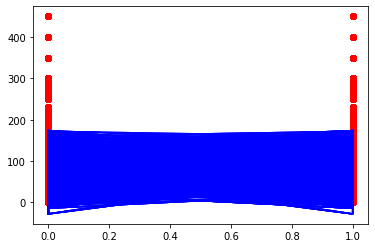

In [ ]:
predicted = model(X).detach().numpy()
plt.plot(xTrain, yTrain, 'ro')
plt.plot(xTrain, predicted, 'b')
plt.show()

In [ ]:
pred = predicted.flatten()
delta = pred - yTrain
absDelta = abs(delta)
print(sum(absDelta) / len(absDelta))

36.13992623277664
